In [2]:
url = 'https://www.worldometers.info/world-population/'
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
html_content = requests.get(url).content
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('tbody')
tr = soup.find_all('tr')

all_data = []
for i in range(len(tr)):
    population = []
    td = tr[i].find_all('td')
    for cell_data in td:
        population.append(cell_data.text)
    all_data.append(population)

clean_data = list(map(lambda x: x[0:7], all_data))
column_name = ['Year', 
               'Population', 
               'Yearly % change',
               'Yearly change',
               'Median age',
               'Fertility rate',
              'Density']

df = pd.DataFrame(clean_data, columns = column_name)

In [3]:
df.tail()

,Year,Population,Yearly % change,Yearly change,Median age,Fertility rate,Density
267,231,Montserrat,"4,992",0.06 %,3,50,100
268,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170"
269,233,Niue,"1,626",0.68 %,11,6,260
270,234,Tokelau,"1,357",1.27 %,17,136,10
271,235,Holy See,801,0.25 %,2,"2,003",0


In [4]:
df.head()

,Year,Population,Yearly % change,Yearly change,Median age,Fertility rate,Density
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52
1,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52
2,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52
3,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51
4,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51


In [5]:
df.to_csv('population.csv', index = False)
df = pd.read_csv('population.csv')

In [6]:
df.isna()

,Year,Population,Yearly % change,Yearly change,Median age,Fertility rate,Density
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
267,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False
269,False,False,False,False,False,False,False
270,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

In [ ]:
df.isna().sum().plot.bar()
plt.title('World Population')

Text(0.5, 1.0, 'World population')

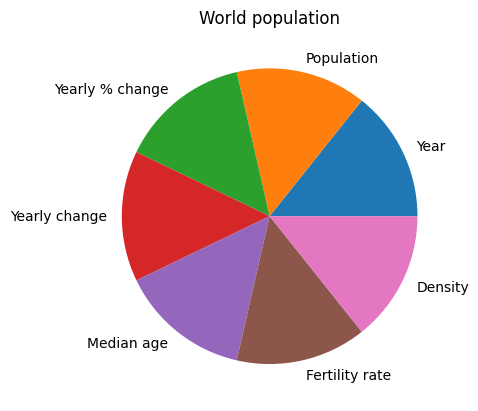

In [8]:
df.isna().sum().plot.pie()
plt.title('World population')

Text(0.5, 1.0, 'World Population')

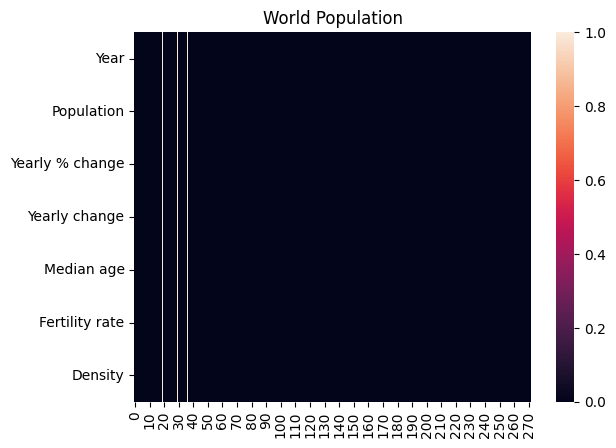

In [7]:
sns.heatmap(df.isna().transpose())
plt.title('World Population')

Text(0.5, 1.0, 'Yearly % change')

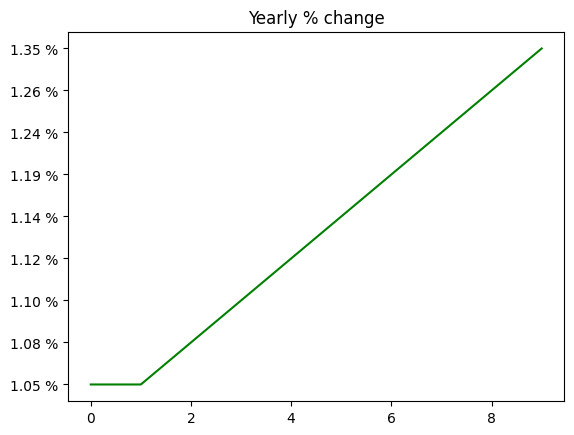

In [13]:
plt.plot(df['Yearly % change'][0:10], color = 'green')
plt.title('Yearly % change')